# 4 Linear Regression Health Costs Calculator

## 4.1 Problem Description



<p>You will be <a href="https://colab.research.google.com/github/freeCodeCamp/boilerplate-linear-regression-health-costs-calculator/blob/master/fcc_predict_health_costs_with_regression.ipynb" target="_blank" rel="noopener noreferrer nofollow">working on this project with Google Colaboratory</a>.</p>

<p>After going to that link, create a copy of the notebook either in your own account or locally. Once you complete the project and it passes the test (included at that link), submit your project link below. If you are submitting a Google Colaboratory link, make sure to turn on link sharing for "anyone with the link."</p>

<p>We are still developing the interactive instructional content for the machine learning curriculum. For now, you can go through the video challenges in this certification. You may also have to seek out additional learning resources, similar to what you would do when working on a real-world project.</p>

<hr>

<p>In this challenge, you will predict healthcare costs using a regression algorithm.</p>

<p>You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.</p>

<p>The first two cells of this notebook import libraries and the data.</p>

<p>Make sure to convert categorical data to numbers. Use 80% of the data as the <code>train_dataset</code> and 20% of the data as the <code>test_dataset</code>.</p>

<p><code>pop</code> off the "expenses" column from these datasets to create new datasets called <code>train_labels</code> and <code>test_labels</code>. Use these labels when training your model.</p>

<p>Create a model and train it with the <code>train_dataset</code>. Run the final cell in this notebook to check your model. The final cell will use the unseen <code>test_dataset</code> to check how well the model generalizes.</p>

<p>To pass the challenge, <code>model.evaluate</code> must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.</p>

<p>The final cell will also predict expenses using the <code>test_dataset</code> and graph the results.</p>

## 4.2 Solution

### 4.2.1 Download Data

In [1]:
!wget -N https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv

--2022-08-02 19:02:15--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2022-08-02 19:02:15 (89.0 MB/s) - ‘insurance.csv’ saved [50264/50264]



### 4.2.2 Install Tensorflow Docs


In [3]:
!pip install -q git+https://github.com/tensorflow/docs

### 4.2.3 Import Libraries

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

### 4.2.4 Prepare Datasets

In [17]:
dataset = pd.read_csv('insurance.csv')
len(dataset)

1338

In [18]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Since the data has some text columns, we need to convert the text values to numeric.

In [19]:
df = dataset
df["sex"] = pd.factorize(df["sex"])[0]
df["region"] = pd.factorize(df["region"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]
dataset = df
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


<p>Let's pick randomly 20% record to make our <code>test_dataset</code> first</p>

In [20]:
test_dataset = dataset.sample(frac=0.2)
len(test_dataset)

268

<p>Now, we select the remaining 80% to make <code>train_dataset</code></p>

In [22]:
train_dataset = dataset[~dataset.isin(test_dataset)].dropna()
len(train_dataset)

1070

In [23]:
train_dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0.0,27.9,0.0,0.0,0.0,16884.92
1,18.0,1.0,33.8,1.0,1.0,1.0,1725.55
2,28.0,1.0,33.0,3.0,1.0,1.0,4449.46
3,33.0,1.0,22.7,0.0,1.0,2.0,21984.47
4,32.0,1.0,28.9,0.0,1.0,2.0,3866.86


### 4.2.5 Prepare the Labels

In [24]:
train_labels = train_dataset.pop("expenses")
train_labels.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [25]:
train_dataset.head()

,age,sex,bmi,children,smoker,region
0,19.0,0.0,27.9,0.0,0.0,0.0
1,18.0,1.0,33.8,1.0,1.0,1.0
2,28.0,1.0,33.0,3.0,1.0,1.0
3,33.0,1.0,22.7,0.0,1.0,2.0
4,32.0,1.0,28.9,0.0,1.0,2.0


In [26]:
test_labels = test_dataset.pop("expenses")
test_labels.head()

638    20149.32
757    23065.42
98     22412.65
292    42112.24
481     9304.70
Name: expenses, dtype: float64

In [27]:
test_dataset.head()

,age,sex,bmi,children,smoker,region
638,39,1,26.4,0,0,3
757,47,0,27.8,0,0,1
98,56,1,20.0,0,0,3
292,25,1,45.5,2,0,1
481,49,1,37.5,2,1,1


### 4.2.6 Prepare the Model

In [28]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(16),
    layers.Dense(4),
    layers.Dropout(.2),
    layers.Dense(1),
])

Compile it.

In [30]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 198
Trainable params: 185
Non-trainable params: 13
_________________________________________________________

Feed it.

In [39]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    validation_split=0.5,
    verbose=0, # disable logging
)

print(history)

## 4.3 Testing

9/9 - 0s - loss: 4140.5332 - mae: 4140.5332 - mse: 50584708.0000 - 30ms/epoch - 3ms/step
Testing set Mean Abs Error: 4140.53 expenses
You passed the challenge. Great job!


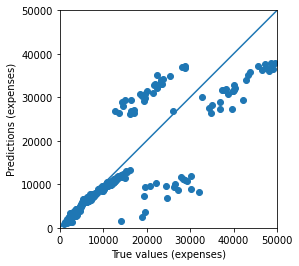

In [40]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 4500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 4500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)